In [45]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:

# ✅ Step 2: Load the IMDB Dataset (from uploaded file and sample it)
df = pd.read_csv("C:/Users/Arham Lab/Downloads/IMDB Dataset.csv").sample(n=2000, random_state=42)
df.dropna(inplace=True)

In [63]:
# ✅ Step 3: Rename columns for clarity
df.rename(columns={"review": "content", "sentiment": "label"}, inplace=True)

In [65]:
# ✅ Step 4: Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['content'])


In [67]:
# ✅ Step 5: Cosine Similarity Matrix (on 2000-sample to avoid MemoryError)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [69]:
# ✅ Step 6: Recommendation Function (based on review similarity)
def get_recommendations(index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    review_indices = [i[0] for i in sim_scores]
    return df['content'].iloc[review_indices]


In [71]:
# ✅ Step 7: Test the Recommendation System
sample_index = 10
print("📩 Input Review:\n", df['content'].iloc[sample_index][:300], "...\n")
print("📝 Recommended Similar Reviews:")
print(get_recommendations(sample_index))


📩 Input Review:
 jeez, this was immensely boring. the leading man (Christian Schoyen) has got to be the worst actor i have ever seen. and another thing, if the character in the movie moved to America when he was ten or something and had been living here for over 20 years, he would speak a lot better English than wha ...

📝 Recommended Similar Reviews:
17554    Once you can get over Nic Cage playing an Ital...
6034     Creepshow 2 had a lot of potential, they just ...
23468    Supposedly, a movie about a magazine sending j...
18315    This is a road movie. At least the movie is in...
5946     I give this movie a 4 cause I'm a die hard fan...
Name: content, dtype: object


C:\Users\Arham Lab\AppData\Local\Temp\ipykernel_3380\1294751645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


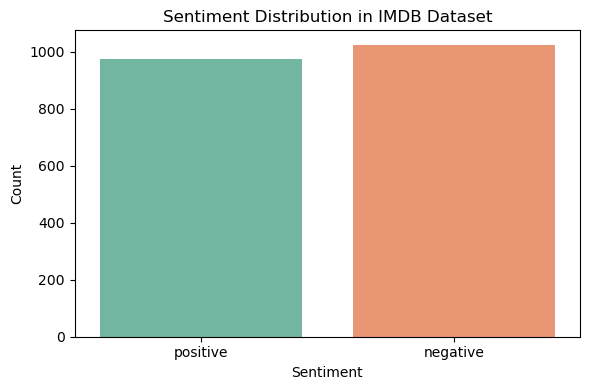

In [75]:
# ✅ Step 8: Visualization - Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Sentiment Distribution in IMDB Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
